In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

CLEANING DATA OR HANDLING MISSING DATA VALUES FROM THE ABOVE FUNCTION USAGE WE CAN OBSERVE THAT AGE AND CABIN HAVE THE HIGHEST VALUES AMONG THE WHICH HAVE MISSING(IE,NAN VALUES) AND DROPPING CABIN CASUE TOO MANY MISSING VALUES CANNOT BE FILLED

In [34]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

WE ARE DONE WITH THE DATA CLEANING OR CLEANING OR HANDLING MISSING DATA VALUES 


THIS IS JUST SURVIVOR VS DEATH COUNT

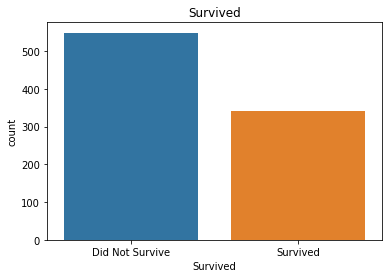

In [35]:
sns.countplot(x='Survived',data=df)
plt.title('Survived')
plt.xticks([0,1],['Did Not Survive','Survived'])
plt.show()

THIS IS THE GENDER SURVIVED COUNT WE CAN SEE THAT IT IS FEMALE MAJORITY,LIKE THESE WE JUST DO GRAPHS WHICH SHOW US THE SURVIVAL DEPANDENCY RATE LIKE GENDER ,AGE ,WEALTH

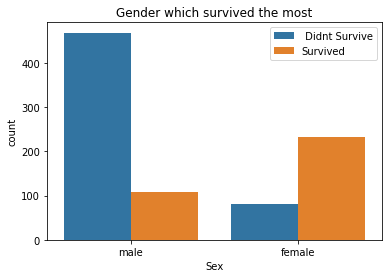

In [36]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Gender which survived the most")
plt.legend(labels=[' Didnt Survive', 'Survived'])
plt.show()

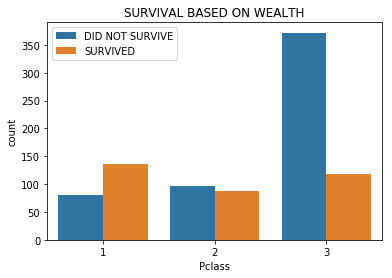

In [37]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("SURVIVAL BASED ON WEALTH")
plt.legend(labels=['DID NOT SURVIVE','SURVIVED'])
plt.show()

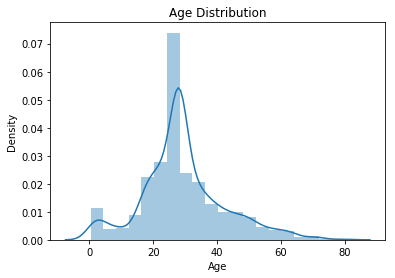

In [38]:
sns.distplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


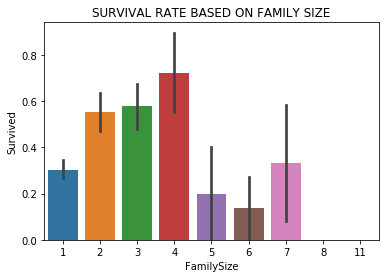

In [39]:
df['FamilySize']=df['SibSp']+df['Parch']+1
sns.barplot(x='FamilySize',y='Survived',data=df)
plt.title('SURVIVAL RATE BASED ON FAMILY SIZE')
plt.show()

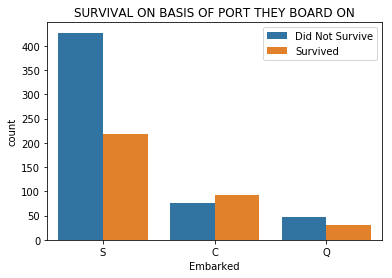

In [40]:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title('SURVIVAL ON BASIS OF PORT THEY BOARD ON')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

In [41]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
pd.get_dummies(df,columns=['Embarked'],drop_first=True)
df['IsAlone']=0
df.loc[df['FamilySize']==1,'IsAlone']==1

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df=pd.get_dummies(df,columns=['Title'],drop_first=True)
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [42]:
x=df.drop('Survived',axis=1)
y=df['Survived']

x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.dtypes)
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
FamilySize      int64
IsAlone         int64
Title_Miss      uint8
Title_Mr        uint8
Title_Mrs       uint8
Title_Rare      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object
Non-numeric columns: []


In [44]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred=model.predict(x_test)
print("accuracy score :",accuracy_score(y_test, y_pred))

accuracy score : 0.7877094972067039


In [46]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("RF Accuracy:", rf.score(x_test, y_test))

RF Accuracy: 0.8268156424581006


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
